In [1]:
## Long Short Term Memory (LSTM) Recurrent Neural Network (RNN)
## This video was guided by the following tutorial: https://www.youtube.com/watch?v=QIUxPv5PJOY

## This program considers the past 60 day stock price for predictoions.

In [2]:
!pip install --upgrade pandas-datareader
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Importing relevant libraries

import math
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Retrieve stock quotes

import yfinance as yf
yf.pdr_override() 

df = web.get_data_yahoo('MSFT', start='2012-01-01', end='2022-01-07')

# Display data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.466696,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.971893,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,22.196424,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.541241,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.244534,59706800
...,...,...,...,...,...,...
2021-12-31,338.510010,339.359985,335.850006,336.320007,333.197906,18000800
2022-01-03,335.350006,338.000000,329.779999,334.750000,331.642426,28865100
2022-01-04,334.829987,335.200012,326.119995,329.010010,325.955750,32674300


In [5]:
# Retrieve matrix dimensions

df.shape

(2521, 6)

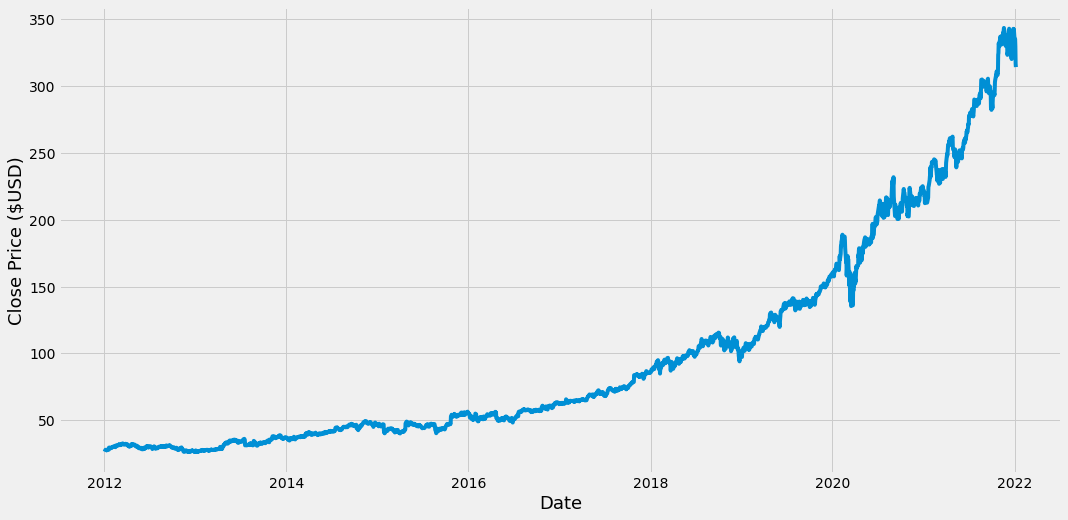

In [6]:
# Visualize the closing price

plt.figure(figsize=(16,8))
plt.title='Close Price History'
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($USD)', fontsize=18)

plt.show()

In [7]:
# Create a new dataframe with only closing prices

data = df.filter(['Close'])

# Convert dataframe to a numpy array
dataset = data.values

# Compute row count to train the model on => 80% of data for training
training_data_len = math.ceil(len(dataset) * 0.8)
print(training_data_len)

2017


In [8]:
# Scale the data for preprocessing

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)   # Computes min and max values for scaling, then transforms. Standardizes data from 0 to 1 inclusive

scaled_data

array([[0.00126286],
       [0.00325187],
       [0.00413588],
       ...,
       [0.95548407],
       [0.91560907],
       [0.90771616]])

In [9]:
# Create the training data set

# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])   # Positions 0 to 59
  y_train.append(train_data[i, 0])        # Position 60
  if i<= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.00126286, 0.00325187, 0.00413588, 0.00549346, 0.00432531,
       0.00464103, 0.00426217, 0.00514617, 0.00593547, 0.00596704,
       0.00587232, 0.00552504, 0.01054492, 0.01060807, 0.00937677,
       0.01007135, 0.00988192, 0.00902948, 0.01022921, 0.00997664,
       0.01111321, 0.01130265, 0.01221822, 0.01209194, 0.01256551,
       0.01354423, 0.01389152, 0.01303908, 0.01329166, 0.01224979,
       0.01161836, 0.01553325, 0.01540696, 0.01600682, 0.0154701 ,
       0.01578582, 0.0161331 , 0.01572267, 0.0173644 , 0.01695397,
       0.01869041, 0.01802741, 0.01714339, 0.01638568, 0.01726968,
       0.0178064 , 0.01774326, 0.01790112, 0.01989012, 0.02020585,
       0.02045841, 0.01966912, 0.01840626, 0.01774326, 0.01749068,
       0.01777483, 0.0178064 , 0.01963756, 0.01941656, 0.01837469])]
[0.018153685590104426]

[array([0.00126286, 0.00325187, 0.00413588, 0.00549346, 0.00432531,
       0.00464103, 0.00426217, 0.00514617, 0.00593547, 0.00596704,
       0.00587232, 0.00552504, 0.0

In [10]:
# Convert x_train and y_train to numpy arrays 

x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
# Reshape the x_train data set => Add third column

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1957, 60, 1)

In [12]:
# Build the LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [13]:
# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')


In [14]:
# Train the model

model.fit(x_train, y_train, batch_size=1, epochs=1)

1957/1957 [==============================] - 56s 27ms/step - loss: 2.0425e-04


In [15]:
# Create the testing data set

# Array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [16]:
# Convert the data to a numpy array

x_test = np.array(x_test)


In [17]:
# Reshape the data 

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  # Num of rows, num of columns, num of features (just the close price)


In [18]:
# Retrieve model's predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)   # Unscale predictions to compare to original closing prices (y_test)



16/16 [==============================] - 1s 15ms/step


In [19]:
# Evaluate root mean square error (RMSE) => Standard deviation of the residuals

rmse = np.sqrt( np.mean( predictions - y_test )**2 )
print(rmse)

3.460145465911381


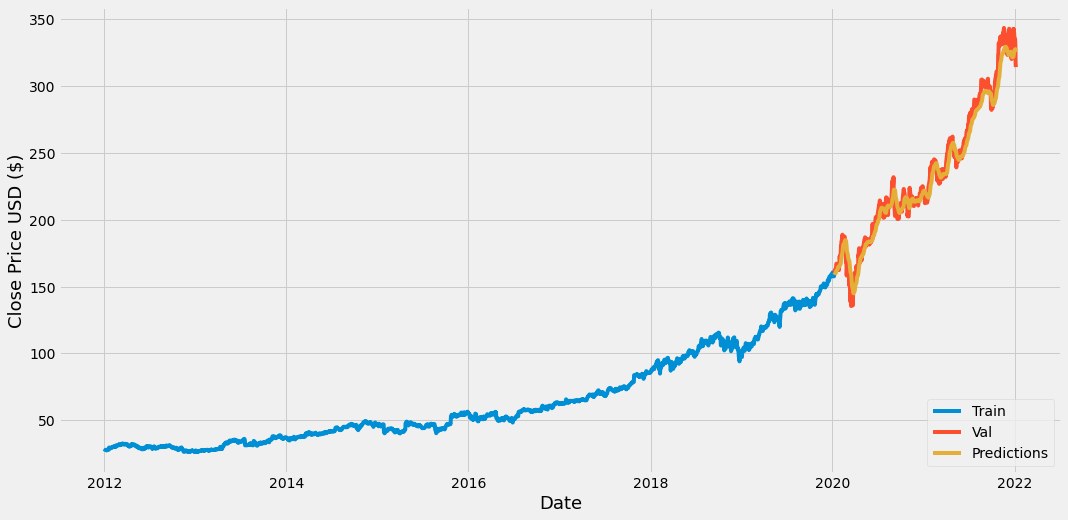

In [20]:
# Plot the data

train = data[:training_data_len].copy()  
valid = data[training_data_len:].copy()  

valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title='Model'
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [21]:
# Display valid and predicted prices

valid

,Close,Predictions
Date,,
2020-01-09,162.089996,158.726547
2020-01-10,161.339996,159.147263
2020-01-13,163.279999,159.577805
2020-01-14,162.130005,160.139175
2020-01-15,163.179993,160.628571
...,...,...
2021-12-31,336.320007,326.437286
2022-01-03,334.750000,327.076599
2022-01-04,329.010010,327.311401


In [22]:
# Predict closing price for ^GSPC stock on december 18, 2019

#.Retrieve actual quote
apple_quote=web.get_data_yahoo('MSFT', start='2012-01-01', end='2022-01-07')

# Create a new dataframe
new_df = apple_quote.filter(['Close'])

# Retrieve only last 60 days of data and convert to array
last_sixty_days = new_df[-60:].values

# Scale the data to [0:1]
last_sixty_days_scaled = scaler.transform(last_sixty_days)

# Initialize list
new_x_test = []
new_x_test.append(last_sixty_days_scaled)

# Convert to numpy array
new_x_test = np.array(new_x_test)

# Reshape
new_x_test = np.reshape(new_x_test, (new_x_test.shape[0], new_x_test.shape[1], 1))

# Calculate predictions
pred_price = model.predict(new_x_test)

# Rescale predictions 
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 28ms/step
[[322.8984]]


In [23]:
# Evaluate efficacy of model

# Retrieve actual future quote data
actual_apple_quote=web.get_data_yahoo('MSFT', start='2022-01-08', end='2022-01-12')
print(actual_apple_quote['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2022-01-10    314.269989
2022-01-11    314.980011
Name: Close, dtype: float64


In [24]:
## Below code added as of 1/1/2023

In [25]:
# Calculate confusion matrix from actual and predicted values

y_actual = y_test
y_hat = predictions

overshot = 0
undershot = 0


for i in range(0, len(y_actual)):
  if y_actual[i] > y_hat[i]:
    undershot+=1
  else:
    overshot+=1


print(np.average(y_actual-y_hat))
print(overshot, undershot)



3.460145465911381
143 361
